## Predicting New York real estate prices using crime statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The New York housing market is vibrant and attracts many investors across the world. 
Recently, with the change in market sentiment and the fluctiation in real estate prices, there is a need to be able 
to predict the value of a property as well as the predict its future value. Real estate agencies, buisnesses and all new yorkers looking to buy a home care about the price of real estate in NYC for various reason.
While there are many factors that affect the price of reaiestate, I propose to focus an initial
investigation on NYC real estate by exploring crime statistics. An initial hypothesis might be, real estate prices are lower in areas of higher crime.  Can we use crime data, in particular trends in crime data across the city to predict the demand for real estate in a particular location?

I will begin the exploration by analyzing trends across Boroughs while normalzing for population size across the boroughs. Next, I plan to look at intra-Borough trends after gathering futher data. Since correlation does not imply causation, we will ultimately examine other factors that wlll affect real estate prices and try to analyze how much of a role crime plays in predicting real estate prices.

This initial analysis uses data comprises real estate sales in NYC across the different boroughs. A second dataset is used comprising crime statistics in NYC. Both datasets were sourced from Kaggle.




In [2]:
def convert_to_float(mylist):
    float_list = []
    for item in mylist:
        if item.isdigit():
            item = float(item)
            float_list.append(item)
        #else:
        #    float_list.append(np.nan)
    return float_list

In [3]:
nyc_sales = pd.read_csv('nyc-rolling-sales.csv')
nyc_crimes = pd.read_csv('crimes-new-york-city/NYPD_Complaint_Data_Historic.csv')
nyc_popul = pd.read_csv('crimes-new-york-city/Population_by_Borough_NYC.csv')


/Users/trevorrhone/tf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Compare avg prices in boroughs with crime rate

# get average borough sales:
#
print(nyc_sales.columns)
boro_nums = np.unique(nyc_sales['BOROUGH'])
print(boro_nums)
print('Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).')
avg_boro_sales_list = []
for boro in boro_nums:
    index = nyc_sales['BOROUGH'] == boro
    boro_sales = nyc_sales['SALE PRICE'][index]
    boro_sales = convert_to_float(boro_sales)      
    avg_boro_sales = np.mean(boro_sales)
    avg_boro_sales_list.append(avg_boro_sales)
print(avg_boro_sales_list)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')
[1 2 3 4 5]
Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
[3337951.2707943763, 590193.64349553129, 834488.37177194655, 739908.61591020005, 543472.11029778735]


Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')


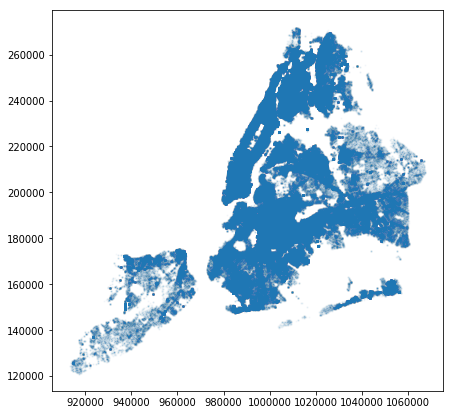

In [5]:
print(nyc_crimes.columns)
x = nyc_crimes['X_COORD_CD']
y = nyc_crimes['Y_COORD_CD']

plt.figure(figsize=(7,7))
plt.scatter(x,y,s=1,alpha=0.03)
plt.show()

In [8]:
# separate by seriousness of crime:

nyc_felony = nyc_crimes[nyc_crimes['LAW_CAT_CD'] == 'FELONY']
nyc_misdem = nyc_crimes[nyc_crimes['LAW_CAT_CD'] == 'MISDEMEANOR']
nyc_violation = nyc_crimes[nyc_crimes['LAW_CAT_CD'] == 'VIOLATION']


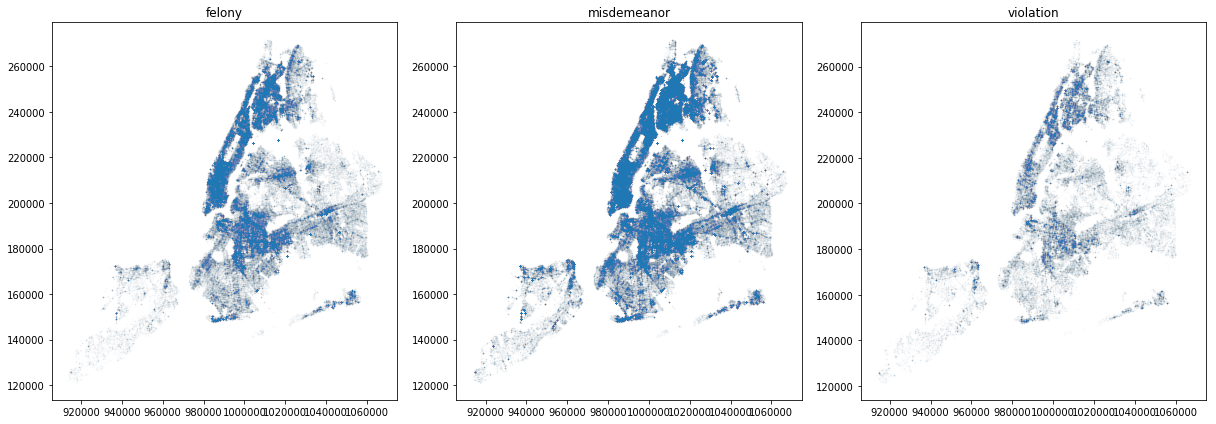

In [17]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
x = nyc_felony['X_COORD_CD']
y = nyc_felony['Y_COORD_CD']
# plt.figure(figsize=(7,7))
plt.title('felony')
plt.scatter(x,y,s=0.1,alpha=0.03)


plt.subplot(1,3,2)
x = nyc_misdem['X_COORD_CD']
y = nyc_misdem['Y_COORD_CD']
plt.title('misdemeanor')
# plt.figure(figsize=(7,7))
plt.scatter(x,y,s=0.1,alpha=0.03)

plt.subplot(1,3,3)
x = nyc_violation['X_COORD_CD']
y = nyc_violation['Y_COORD_CD']
# plt.figure(figsize=(7,7))
plt.title('violation')
plt.scatter(x,y,s=0.1,alpha=0.03)
plt.tight_layout()
plt.show()


### CRIME RATE by borough.. Number of crimes versus population:

In [19]:
nyc_popul[['Borough','2010 - Boro share of NYC total', '2010']]

,Borough,2010 - Boro share of NYC total,2010
0,NYC Total,100%,"8,242,624"
1,Bronx,16.8%,"1,385,108"
2,Brooklyn,30.97%,"2,552,911"
3,Manhattan,19.24%,"1,585,873"
4,Queens,27.3%,"2,250,002"
5,Staten Island,5.69%,"468,730"


In [20]:
bronx_pop = float((nyc_popul['2010'][1]).replace(',',''))
brooklyn_pop = nyc_popul['2010'][2]
brooklyn_pop = float(brooklyn_pop.replace(',',''))
manhattan_pop = nyc_popul['2010'][3]
manhattan_pop = float(manhattan_pop.replace(',',''))
queens_pop = nyc_popul['2010'][4]
queens_pop = float(queens_pop.replace(',',''))
staten_pop = nyc_popul['2010'][5]
staten_pop = float(staten_pop.replace(',',''))
print((bronx_pop))

1385108.0


In [21]:
bronx_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'BRONX']
brooklyn_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'BROOKLYN']
manhattan_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'MANHATTAN']
queens_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'QUEENS']
staten_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'STATEN ISLAND']
        

In [22]:
num_bronx_crimes = len(bronx_crime)
num_brooklyn_crimes = len(brooklyn_crime) 
num_manhattan_crimes = len(manhattan_crime)
num_queens_crimes = len(queens_crime) 
num_staten_crimes = len(staten_crime )

rate_bronx_crimes = len(bronx_crime)/bronx_pop*1.0
rate_brooklyn_crimes = len(brooklyn_crime)/brooklyn_pop*1.0 
rate_manhattan_crimes = len(manhattan_crime)/manhattan_pop*1.0
rate_queens_crimes = len(queens_crime)/queens_pop*1.0 
rate_staten_crimes = len(staten_crime )/staten_pop*1.0

In [23]:
borough_crimes = [rate_manhattan_crimes,rate_bronx_crimes,rate_brooklyn_crimes,rate_queens_crimes,rate_staten_crimes]

In [24]:
print('borough_crimes ', borough_crimes)
print('avg_boro_sales_list ',avg_boro_sales_list)

borough_crimes  [0.15433076923561975, 0.16423051487681828, 0.1236423831461418, 0.09420347181913616, 0.10398950355215156]
avg_boro_sales_list  [3337951.2707943763, 590193.64349553129, 834488.37177194655, 739908.61591020005, 543472.11029778735]


Text(0,0.5,'sales price')

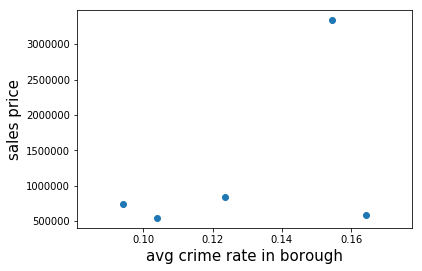

In [25]:
plt.scatter(borough_crimes, avg_boro_sales_list)
plt.xlabel('avg crime rate in borough',fontsize=15)
plt.ylabel('sales price',fontsize=15)

### Real estate sales estimate
Consider:
* without crime
* with crime stats
* compare using p-values

In [506]:
print(nyc_sales.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [27]:
nyc_sales = pd.read_csv('nyc-rolling-sales.csv')
#scrub prices that are not real sale... price < 1000)
sales_price = pd.to_numeric(nyc_sales['SALE PRICE'], errors = 'coerce')
nyc_sales = nyc_sales[sales_price > 1000]
nyc_sales_nna = nyc_sales.dropna(axis=1).copy()
Sales_info = nyc_sales_nna[['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT', 
       'BUILDING CLASS AT PRESENT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'BUILDING CLASS AT TIME OF SALE']]

print(Sales_info.shape)
Sales_info = Sales_info.dropna(axis=1)

# print(nyc_sales_nna.shape)
# nyc_sales_nna = nyc_sales_nna[exists_index]
# print(nyc_sales_nna.shape)
Sales_info = nyc_sales_nna[['ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS','SALE PRICE',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']]
Sales_info['LAND SQUARE FEET'] = pd.to_numeric(Sales_info['LAND SQUARE FEET'], errors='coerce')
Sales_info['GROSS SQUARE FEET'] = pd.to_numeric(Sales_info['GROSS SQUARE FEET'], errors='coerce')
Sales_info['SALE PRICE'] = pd.to_numeric(Sales_info['SALE PRICE'], errors='coerce')

Sales_info_cat = nyc_sales_nna[['BUILDING CLASS CATEGORY','BOROUGH','NEIGHBORHOOD','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE']]
Sales_info_dum = pd.get_dummies(Sales_info_cat[:])
Sales_info_combine = pd.concat((Sales_info,Sales_info_dum),axis=1)

print('before', Sales_info_combine.shape)
Sales_info_combine = Sales_info_combine.dropna(axis=0)
print('after', Sales_info_combine.shape)

Sales = Sales_info_combine['SALE PRICE'] 
# exists_index = [x.isdigit() for x in Sales]


X = Sales_info_combine.copy()
# print(X.columns)
X = X.drop(columns='SALE PRICE')
Y = Sales.copy()



(58604, 14)


/Users/trevorrhone/tf/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/trevorrhone/tf/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/trevorrhone/tf/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

before (58604, 614)
after (37043, 614)


37043
37043


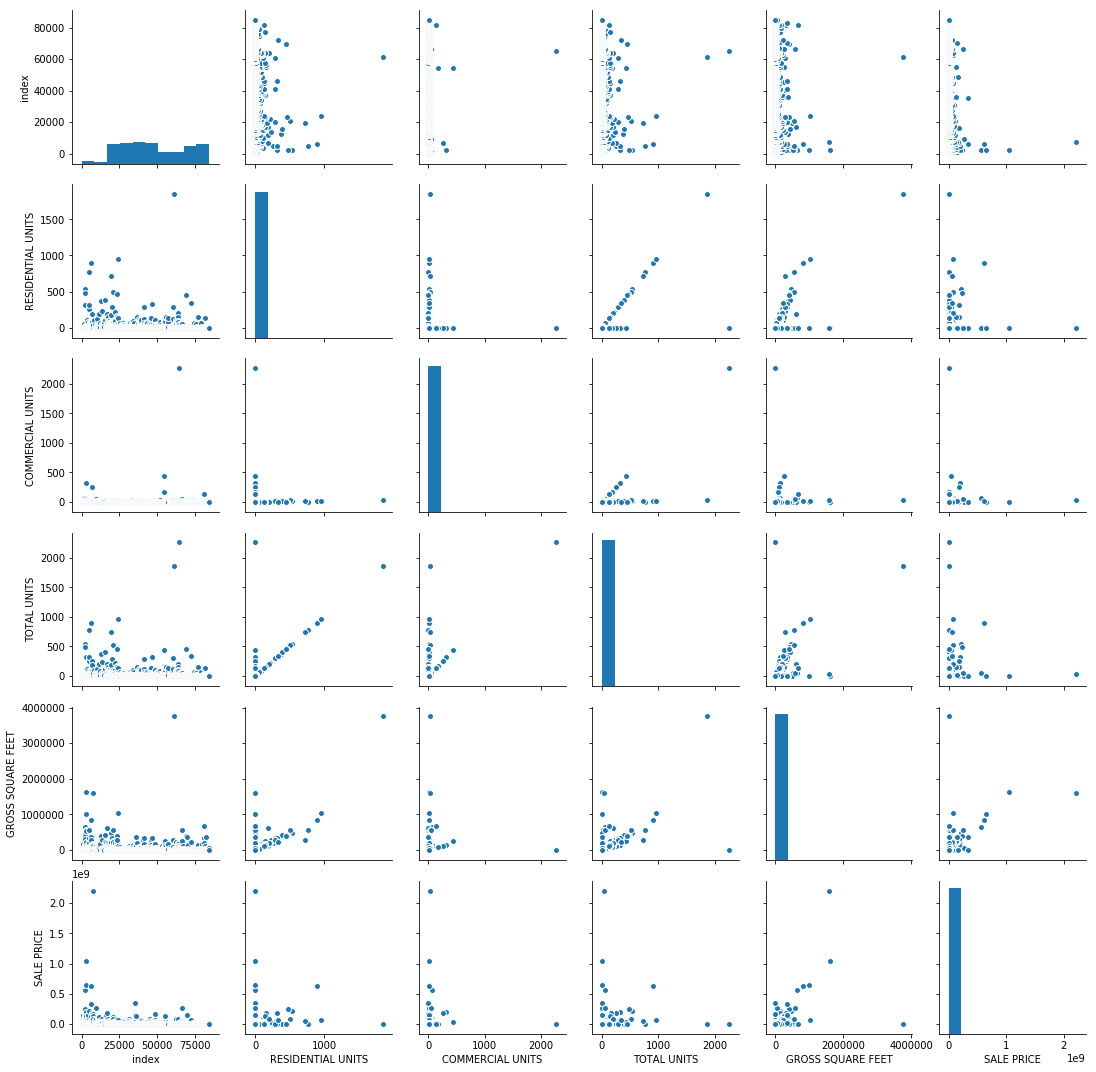

In [28]:
Xsub = X[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET']]
Xplus = pd.concat((Xsub, Y),axis=1)
Xplus = Xplus.reset_index()
# plt.scatter(Xsub['RESIDENTIAL UNITS'],Y)
sns.pairplot(Xplus)


In [29]:
X = X.reset_index()
Y = Y.reset_index()
N = len(Y)
split = 0.8
trN = int(np.floor(N*split))
print(trN)
randnum = np.random.permutation(np.arange(N))
tr_index = np.asarray(randnum[:trN])
te_index = np.asarray(randnum[trN:])
Ytrain = Y.iloc[tr_index]
Xtrain = X.iloc[tr_index,:]
Ytest = Y.iloc[te_index]
Xtest = X.iloc[te_index,:]

29634


In [30]:
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor(n_estimators=10)
clf = clf.fit(Xtrain, Ytrain)
pred = clf.predict(Xtest)

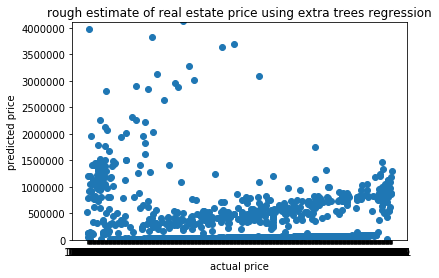

In [32]:
plt.scatter(Ytest[:500],pred[:500])
plt.ylim(0,0.41e7)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('rough estimate of real estate price using extra trees regression')
plt.show()

The above model excludes crime statistics to estimate real estate price. One of the next steps is to include crime statistis and measure any improvement in model performance.

We show first that we can build a model that fits our data. Initial attempts will not use careful hyperparameter tuning.  Nextsteps will use hyperparameter tuning that will improve our model. Initial results are promising with now hyperparameter tuning or cross validation.

Our first model will not include any information on Crime statistics. After we build our model and prove its performance we will note how it performs without crime statistics data.  Then we will include the Crime stats data nd measure any performance in the model.  We will accoutn for the increase in the nunber of parameters.  If there is improvement in the model performace, we can claim that crime is important for determing the Salse price of real estate

Analysis thus far has been limited to inter-Borough data.  Next steps will include analysis of locations withina given Borough.

We have thus far not been able to show if crime statistics does indeed affect real estate prices. One big factor that could be included to consider the impact of crime is the demand for housing. Population density could be used as a proxy for this.